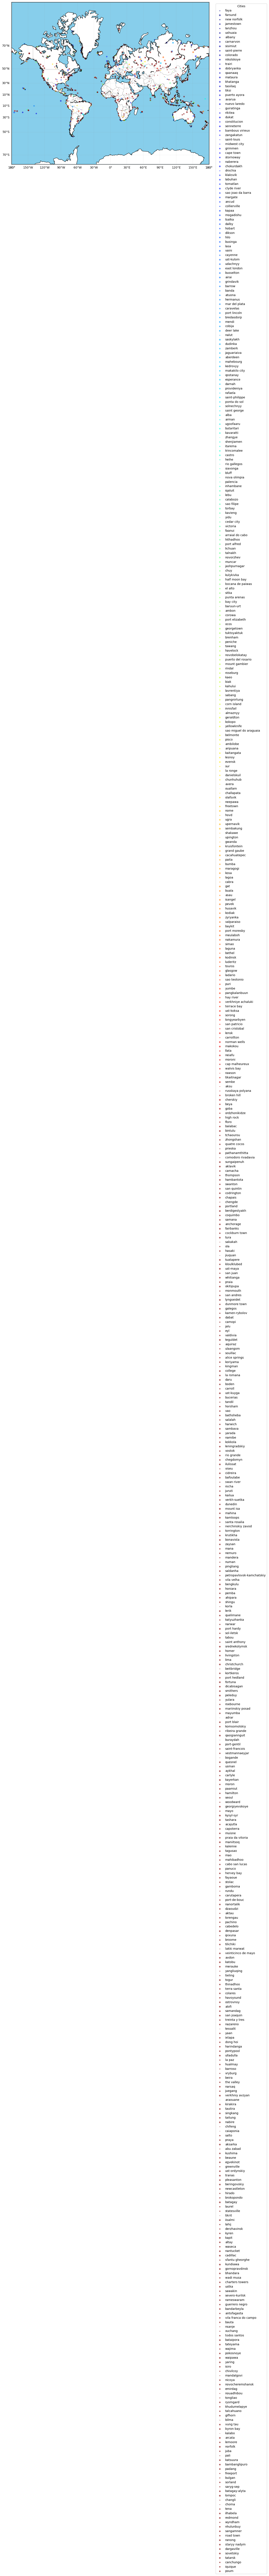

In [2]:
# Import libraries for data handling, plot creation and geographic mapping. 
import pandas as pd  
import matplotlib.pyplot as plt  
from mpl_toolkits.basemap import Basemap  

# Load city data from CSV and create Basemap for map projection. 
city_data_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/python-api-challenge/main/output_data/cities.csv')
plt.figure(figsize=(12, 12))
m = Basemap(projection='merc', llcrnrlat=-75, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

# Convert city coordinates to map coordinates and calculate point size based on humidity. 
x, y = m(city_data_df['Lng'].values, city_data_df['Lat'].values)
point_size = city_data_df['Humidity'] / 3

# Create unique city colours using a colourmap.
unique_colors = plt.cm.jet(range(len(city_data_df)))

# Customize the map with coastlines, boundaries, gridlines and adjust axis labels for latitude and longitude.
m.drawcoastlines()
m.drawmapboundary(fill_color='skyblue')
m.drawcountries(color='grey')
m.fillcontinents(color='white', lake_color='skyblue')
m.drawparallels(range(-90, 91, 20), labels=[1, 0, 0, 0], linewidth=0.5, color='gray', dashes=[1, 4])
m.drawmeridians(range(-180, 181, 30), labels=[0, 0, 0, 1], linewidth=0.5, color='gray', dashes=[1, 4])

# Plot cities with unique colours, add a legend and show the map.
for i, city in enumerate(city_data_df['City']):
    m.scatter(x[i], y[i], color=unique_colors[i], s=point_size[i], edgecolor='none', alpha=0.6, label=city)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Cities')
plt.show()